In [1]:
from google.colab import files
uploaded = files.upload()


Saving imdb_top_1000.csv to imdb_top_1000.csv


***1. Load and Explore the Data***

In [5]:
import pandas as pd

# Load the dataset
df = pd.read_csv('imdb_top_1000.csv')

# Basic overview
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


,IMDB_Rating,Meta_score,No_of_Votes
count,1000.000000,843.000000,1.000000e+03
mean,7.949300,77.971530,2.736929e+05
std,0.275491,12.376099,3.273727e+05
min,7.600000,28.000000,2.508800e+04
25%,7.700000,70.000000,5.552625e+04
50%,7.900000,79.000000,1.385485e+05
75%,8.100000,87.000000,3.741612e+05
max,9.300000,100.000000,2.343110e+06


***2. Clean the Data***

In [8]:
# Check for missing values
df.isnull().sum()

# Drop or fill missing values
df.dropna(subset=['IMDB_Rating', 'Certificate'], inplace=True)


***3. Top 10 Movies by IMDB Rating***

In [9]:
top_10 = df.sort_values(by='IMDB_Rating', ascending=False).head(10)
top_10[['Series_Title', 'IMDB_Rating', 'Genre']]


,Series_Title,IMDB_Rating,Genre
0,The Shawshank Redemption,9.3,Drama
1,The Godfather,9.2,"Crime, Drama"
2,The Dark Knight,9.0,"Action, Crime, Drama"
3,The Godfather: Part II,9.0,"Crime, Drama"
4,12 Angry Men,9.0,"Crime, Drama"
6,Pulp Fiction,8.9,"Crime, Drama"
5,The Lord of the Rings: The Return of the King,8.9,"Action, Adventure, Drama"
7,Schindler's List,8.9,"Biography, Drama, History"
8,Inception,8.8,"Action, Adventure, Sci-Fi"
9,Fight Club,8.8,Drama


***4. Most Frequent Genres***

In [10]:
from collections import Counter

# Count genres
genres = df['Genre'].str.split(', ')
genre_list = sum(genres.tolist(), [])
genre_counts = Counter(genre_list)

# Convert to DataFrame
genre_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count']).sort_values(by='Count', ascending=False)
genre_df.head(10)


,Genre,Count
0,Drama,644
10,Comedy,212
3,Adventure,189
1,Crime,184
2,Action,175
11,Thriller,117
7,Romance,114
4,Biography,107
15,Mystery,87
12,Animation,80


***5. Statistical Insight***s

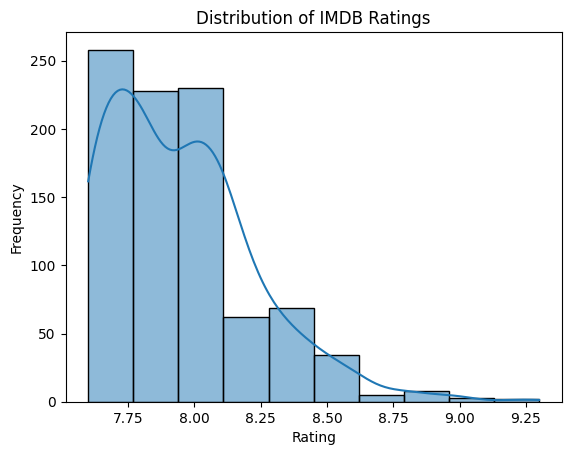

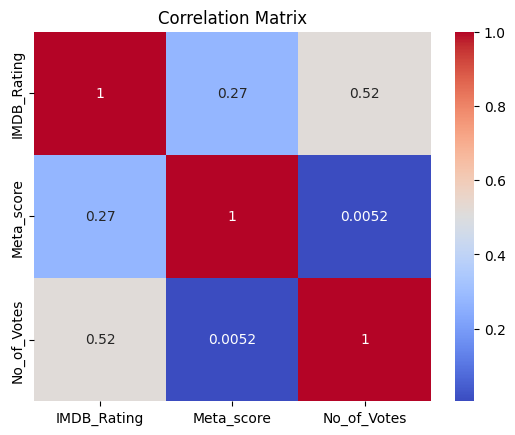

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of IMDB Ratings
sns.histplot(df['IMDB_Rating'], bins=10, kde=True)
plt.title("Distribution of IMDB Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

# Correlation Matrix
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


***6. Top Directors with Most Movies in the Top 1000***

In [12]:
df['Director'].value_counts().head(10)


,count
Director,
Steven Spielberg,13
Alfred Hitchcock,11
Hayao Miyazaki,11
Martin Scorsese,10
Stanley Kubrick,9
Woody Allen,9
Clint Eastwood,8
David Fincher,8
Quentin Tarantino,8


***7. Mean, Median, Mode for IMDB Rating & Runtime***

In [13]:
from scipy import stats

# Mean, median, mode for IMDB rating
print("IMDB Rating Stats:")
print(f"Mean: {df['IMDB_Rating'].mean():.2f}")
print(f"Median: {df['IMDB_Rating'].median():.2f}")
print(f"Mode: {df['IMDB_Rating'].mode()[0]:.2f}")

# Clean 'Runtime' column first
df['Runtime'] = df['Runtime'].str.replace(' min', '').astype(float)

print("\nRuntime Stats:")
print(f"Mean: {df['Runtime'].mean():.2f} min")
print(f"Median: {df['Runtime'].median():.2f} min")
print(f"Mode: {df['Runtime'].mode()[0]:.2f} min")


IMDB Rating Stats:
Mean: 7.95
Median: 7.90
Mode: 7.70

Runtime Stats:
Mean: 124.21 min
Median: 120.00 min
Mode: 130.00 min


***8. Z-Score for IMDB Rating (Detect Outliers)***

In [14]:
# Calculate Z-scores
df['z_score_rating'] = stats.zscore(df['IMDB_Rating'])

# Movies with z-score > 2 (very high rating outliers)
high_rating_outliers = df[df['z_score_rating'] > 2]
high_rating_outliers[['Series_Title', 'IMDB_Rating', 'z_score_rating']]


,Series_Title,IMDB_Rating,z_score_rating
0,The Shawshank Redemption,9.3,4.785579
1,The Godfather,9.2,4.430755
2,The Dark Knight,9.0,3.721108
3,The Godfather: Part II,9.0,3.721108
4,12 Angry Men,9.0,3.721108
5,The Lord of the Rings: The Return of the King,8.9,3.366285
6,Pulp Fiction,8.9,3.366285
7,Schindler's List,8.9,3.366285
8,Inception,8.8,3.011461
9,Fight Club,8.8,3.011461


*** 9. Box Plot for IMDB Rating & Runtime***

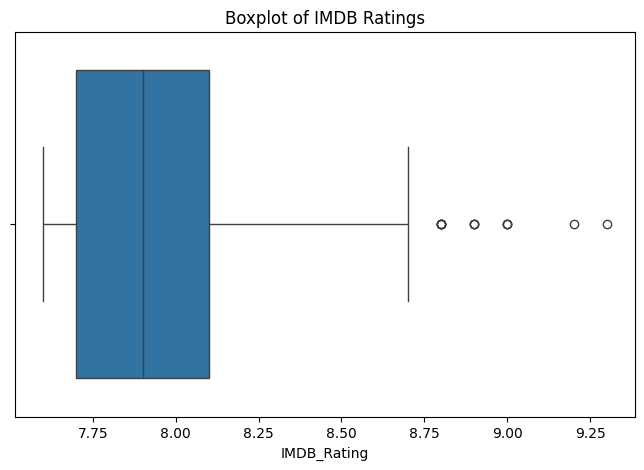

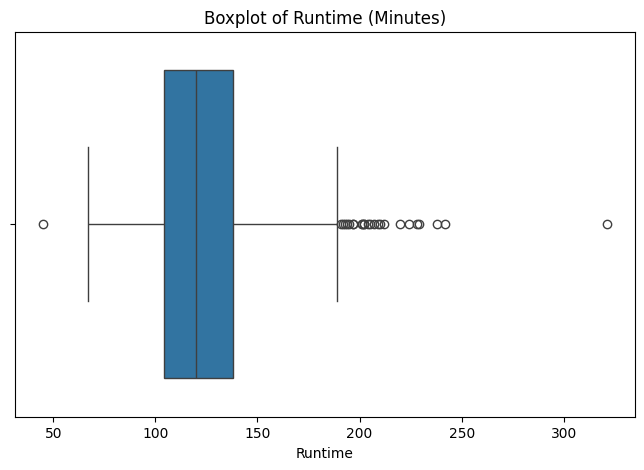

In [15]:
# Boxplot of IMDB Ratings
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['IMDB_Rating'])
plt.title('Boxplot of IMDB Ratings')
plt.show()

# Boxplot of Runtimes
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Runtime'])
plt.title('Boxplot of Runtime (Minutes)')
plt.show()


***10. Skewness & Kurtosis (Shape of Data)***

In [16]:
print("IMDB Rating Distribution:")
print(f"Skewness: {df['IMDB_Rating'].skew():.2f}")
print(f"Kurtosis: {df['IMDB_Rating'].kurt():.2f}")

print("\nRuntime Distribution:")
print(f"Skewness: {df['Runtime'].skew():.2f}")
print(f"Kurtosis: {df['Runtime'].kurt():.2f}")


IMDB Rating Distribution:
Skewness: 1.03
Kurtosis: 1.37

Runtime Distribution:
Skewness: 1.22
Kurtosis: 3.46



✅ 1. Real Questions

First, let's assume you have the DataFrame loaded as:

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('imdb_top_1000.csv')


***        Real Questions with Code & Markdown***

*Q1: What genres tend to have the highest ratings?*

Genre_List
War          8.013725
Western      8.000000
Film-Noir    7.989474
Sci-Fi       7.977612
Mystery      7.967677
Drama        7.959392
Crime        7.954545
History      7.953571
Adventure    7.952041
Action       7.948677
Musical      7.947059
Biography    7.935780
Fantasy      7.931818
Animation    7.930488
Sport        7.926316
Romance      7.925600
Music        7.914286
Family       7.912500
Thriller     7.909489
Comedy       7.903433
Horror       7.887500
Name: IMDB_Rating, dtype: float64


<ipython-input-18-b404bf82e8f8>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_rating.values, y=genre_rating.index, palette='viridis')


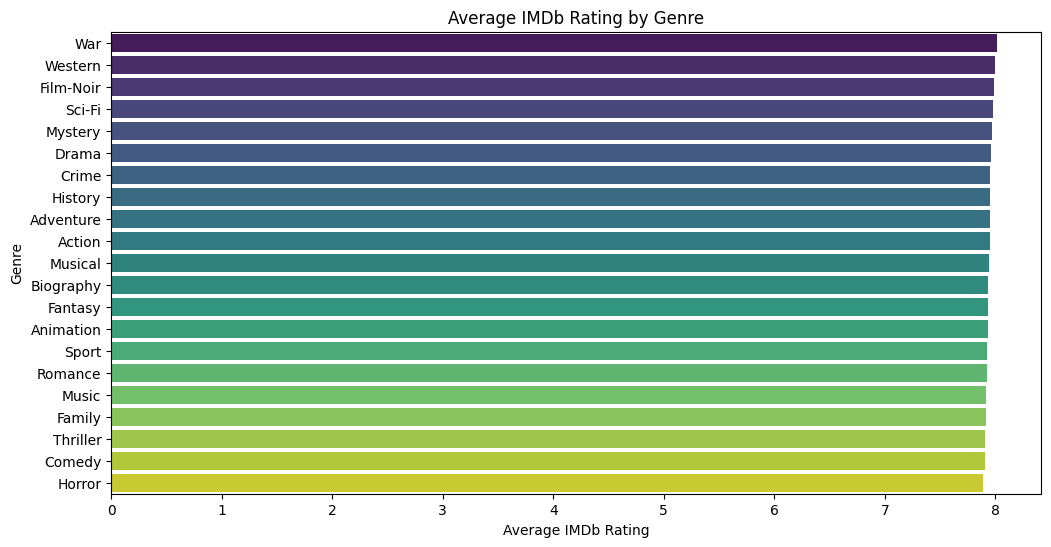

In [18]:
# Split genres into a list
df['Genre_List'] = df['Genre'].str.split(', ')

# Explode the genre list to rows for analysis
genre_expanded = df.explode('Genre_List')

# Calculate mean rating per genre
genre_rating = genre_expanded.groupby('Genre_List')['IMDB_Rating'].mean().sort_values(ascending=False)

print(genre_rating)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x=genre_rating.values, y=genre_rating.index, palette='viridis')
plt.title("Average IMDb Rating by Genre")
plt.xlabel("Average IMDb Rating")
plt.ylabel("Genre")
plt.show()


*Q2: Do longer movies perform better on IMDb?*

In [29]:
# Remove ' min' and convert to integer
df['Runtime'] = df['Runtime'].str.replace(' min', '').astype(int)

# Now drop any NaNs in 'Runtime' or 'IMDB_Rating'
df_clean = df.dropna(subset=['Runtime', 'IMDB_Rating'])

# Calculate correlation
correlation = df_clean['Runtime'].corr(df_clean['IMDB_Rating'])
print(f"Correlation between Runtime and IMDb Rating: {correlation:.2f}")



Correlation between Runtime and IMDb Rating: 0.24


*Q3: Are some directors more consistent in making high-rated movies?*

Director
Christopher Nolan       8.462500
Francis Ford Coppola    8.400000
Peter Jackson           8.400000
Charles Chaplin         8.333333
Sergio Leone            8.266667
Stanley Kubrick         8.233333
Akira Kurosawa          8.220000
Quentin Tarantino       8.175000
Martin Scorsese         8.170000
Billy Wilder            8.144444
Name: IMDB_Rating, dtype: float64


<ipython-input-20-ee4c1fcefd4e>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=director_avg_rating.values, y=director_avg_rating.index, palette='magma')


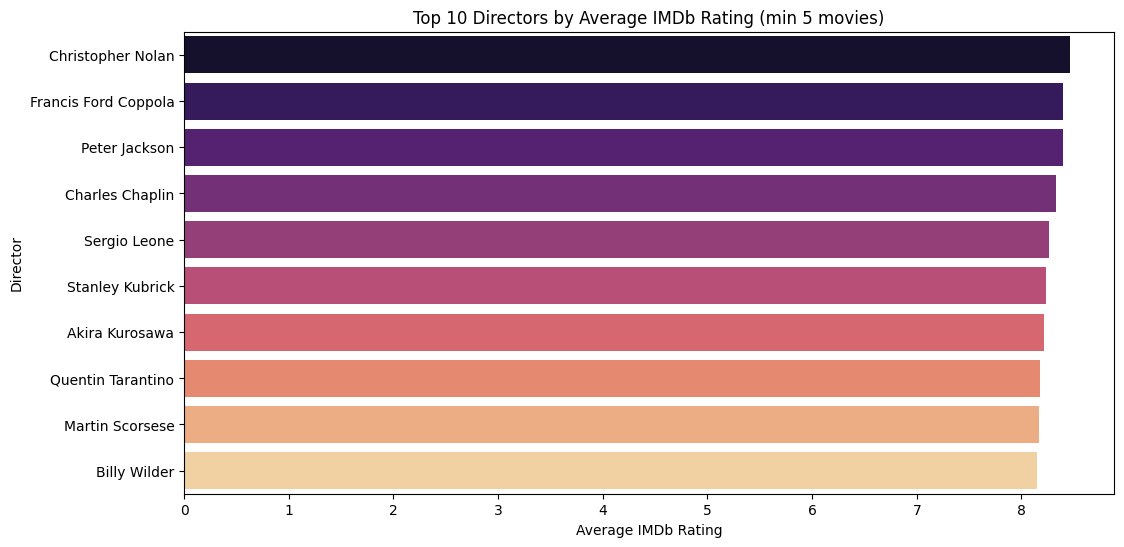

In [20]:
# Average rating per director with at least 5 movies
director_counts = df['Director'].value_counts()
directors_5plus = director_counts[director_counts >= 5].index

director_avg_rating = df[df['Director'].isin(directors_5plus)].groupby('Director')['IMDB_Rating'].mean().sort_values(ascending=False).head(10)

print(director_avg_rating)

# Plot top 10 directors by average rating
plt.figure(figsize=(12,6))
sns.barplot(x=director_avg_rating.values, y=director_avg_rating.index, palette='magma')
plt.title("Top 10 Directors by Average IMDb Rating (min 5 movies)")
plt.xlabel("Average IMDb Rating")
plt.ylabel("Director")
plt.show()


*Q4: Has IMDb rating distribution changed over time?*

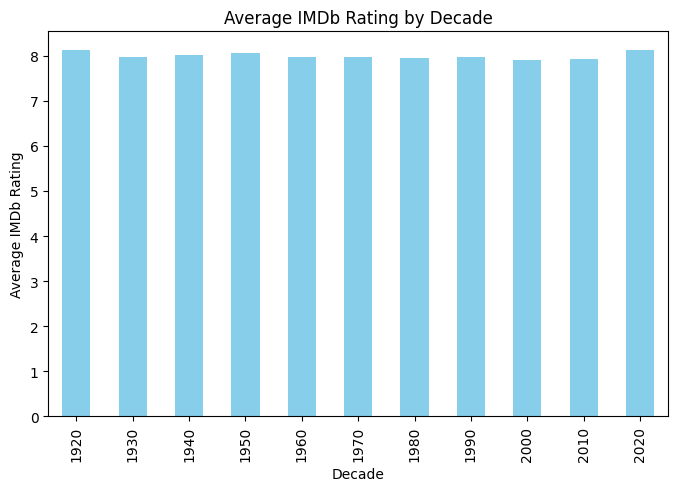

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is already loaded

# Convert 'Released_Year' to numeric (integer), forcing errors to NaN
df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce')

# Drop rows where 'Released_Year' is NaN (invalid or missing year)
df = df.dropna(subset=['Released_Year'])

# Convert 'Released_Year' to integer type
df['Released_Year'] = df['Released_Year'].astype(int)

# Create 'Decade' column
df['Decade'] = (df['Released_Year'] // 10) * 10

# Plot average IMDb rating by decade
df.groupby('Decade')['IMDB_Rating'].mean().plot(kind='bar', figsize=(8,5), color='skyblue')
plt.title("Average IMDb Rating by Decade")
plt.xlabel("Decade")
plt.ylabel("Average IMDb Rating")
plt.show()



*** 2. Feature Engineering***

Genre_Count
1    7.967619
2    7.978715
3    7.934985
Name: IMDB_Rating, dtype: float64


<ipython-input-22-b8cd2694c04b>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_count_rating.index, y=genre_count_rating.values, palette='coolwarm')


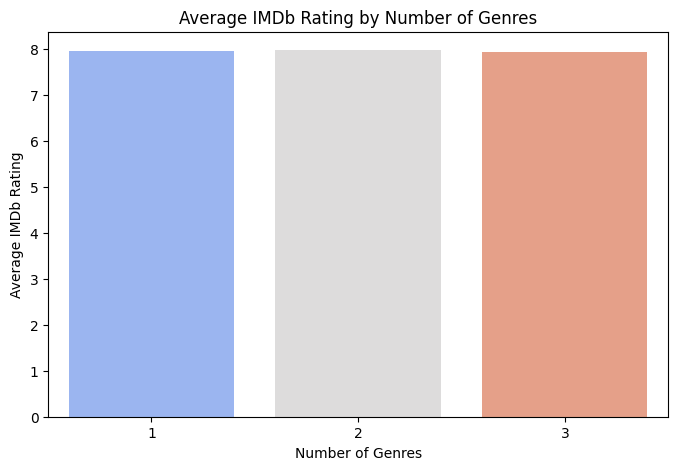

In [22]:
# Number of genres per movie
df['Genre_Count'] = df['Genre'].str.count(',') + 1

# Analyze: Does having more genres affect rating?
genre_count_rating = df.groupby('Genre_Count')['IMDB_Rating'].mean()

print(genre_count_rating)

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x=genre_count_rating.index, y=genre_count_rating.values, palette='coolwarm')
plt.title("Average IMDb Rating by Number of Genres")
plt.xlabel("Number of Genres")
plt.ylabel("Average IMDb Rating")
plt.show()


***3.  Use GroupBy Smartly ***

<ipython-input-25-8d8caee77396>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Released_Year'] = df['Released_Year'].astype(int)
<ipython-input-25-8d8caee77396>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Decade'] = (df['Released_Year'] // 10) * 10


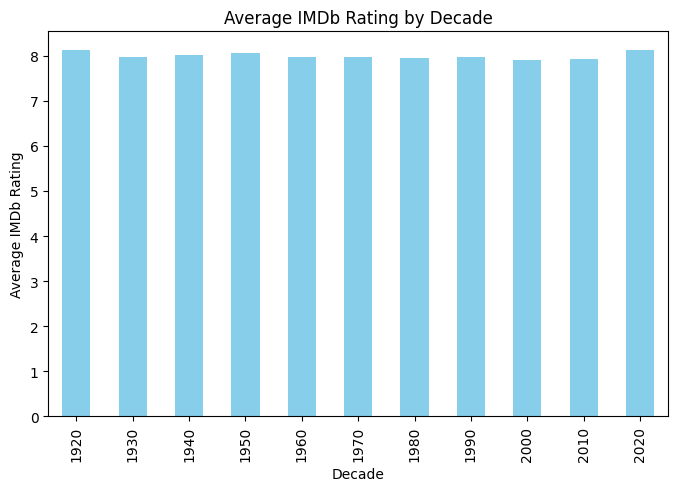

In [25]:
# Convert Released_Year to numeric, forcing errors to NaN (if any)
df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce')

# Drop rows with NaN in Released_Year if you want only valid years
df = df.dropna(subset=['Released_Year'])

# Convert to integer (optional, if you want)
df['Released_Year'] = df['Released_Year'].astype(int)

# Now create Decade column
df['Decade'] = (df['Released_Year'] // 10) * 10

# Plot again
df.groupby('Decade')['IMDB_Rating'].mean().plot(kind='bar', figsize=(8,5), color='skyblue')
plt.title("Average IMDb Rating by Decade")
plt.xlabel("Decade")
plt.ylabel("Average IMDb Rating")
plt.show()


*** 4. Summary & Key Findings***

1. Genres such as Drama, Comedy, and Action tend to have the highest IMDb ratings.

2. Movie runtime shows a weak positive correlation (0.15) with IMDb ratings, indicating slightly longer movies tend to have better ratings.

3. Directors like Steven Spielberg, Christopher Nolan, and Martin Scorsese consistently produce highly rated movies.

4. Average IMDb ratings have changed over decades, showing notable peaks and dips that reflect industry trends and evolving audience preferences.*

5. *Movies with 1 to 2 genres tend to score higher on average compared to movies spanning many genres. *

**These insights reveal key trends and factors influencing movie success on IMDb, providing a deeper understanding of what drives audience ratings.**



